In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [12]:
df = pd.read_csv('large_dataset.csv')

In [16]:
print(df.isnull().sum())

User_ID           0
Product_ID        0
Category          0
Price             0
Wishlist_Count    0
Return_History    0
Days_to_Return    0
Product_Rating    0
Return_Status     0
dtype: int64


In [20]:
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_ID         10000 non-null  int64  
 1   Product_ID      10000 non-null  object 
 2   Category        10000 non-null  object 
 3   Price           10000 non-null  int64  
 4   Wishlist_Count  10000 non-null  int64  
 5   Return_History  10000 non-null  int64  
 6   Days_to_Return  10000 non-null  int64  
 7   Product_Rating  10000 non-null  float64
 8   Return_Status   10000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 703.3+ KB


(None,
    User_ID Product_ID     Category  Price  Wishlist_Count  Return_History  \
 0     9726       P372       Sports   2046              24               1   
 1     1695       P429       Beauty   1252              22               0   
 2     1176       P821         Home    906              26               0   
 3     1853       P404      Fashion   4725               1               0   
 4     1726       P642  Electronics   2111              34               0   
 
    Days_to_Return  Product_Rating  Return_Status  
 0               8             4.5              0  
 1              19             3.4              0  
 2              12             3.3              1  
 3              12             1.2              0  
 4              17             1.5              0  )

In [21]:
category_return_analysis = df.groupby('Category')['Return_Status'].agg(
    total_orders='count',
    total_returns='sum'
)
category_return_analysis['return_percentage'] = (
    category_return_analysis['total_returns'] / category_return_analysis['total_orders']
) * 100

category_return_analysis.sort_values(by='return_percentage', ascending=False)

,total_orders,total_returns,return_percentage
Category,,,
Home,2004,1026,51.197605
Sports,2015,1029,51.066998
Fashion,2013,1010,50.173870
Electronics,1949,969,49.717804
Beauty,2019,985,48.786528


In [24]:
features = ['Price', 'Wishlist_Count', 'Return_History', 'Days_to_Return', 'Product_Rating']
X = df[features]
y = df['Return_Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       977
           1       0.51      0.49      0.50      1023

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.50      0.50      0.50      2000

ROC AUC Score: 0.5090262748994218


C:\Users\Abhishek Joshi\AppData\Local\Temp\ipykernel_7596\2034588178.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


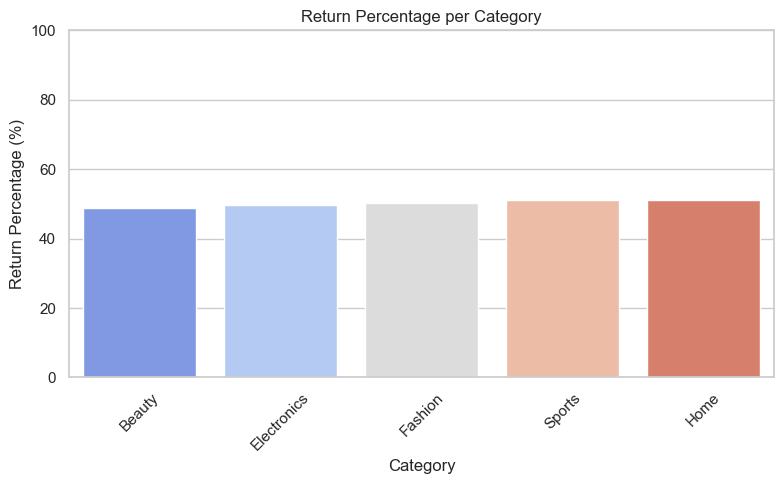

In [ ]:
sns.set(style='whitegrid')

category_return_analysis = df.groupby('Category')['Return_Status'].mean().sort_values() * 100

plt.figure(figsize=(8, 5))
sns.barplot(
    x=category_return_analysis.index,
    y=category_return_analysis.values,
    palette='coolwarm'
)
plt.title('Return Percentage per Category')
plt.ylabel('Return Percentage (%)')
plt.xlabel('Category')
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

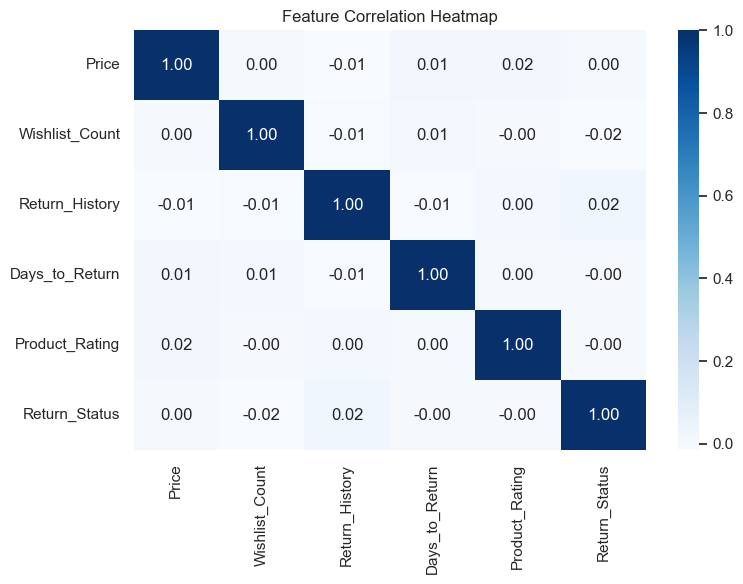

In [26]:
plt.figure(figsize=(8, 6))
corr = df[['Price', 'Wishlist_Count', 'Return_History', 'Days_to_Return', 'Product_Rating', 'Return_Status']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

C:\Users\Abhishek Joshi\AppData\Local\Temp\ipykernel_7596\1152963262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Return_Status', data=df, palette='Set2')


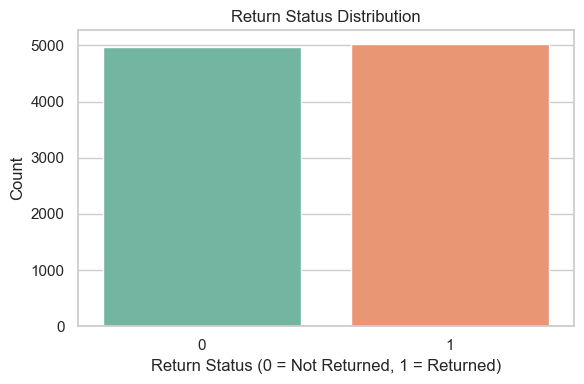

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Return_Status', data=df, palette='Set2')
plt.title('Return Status Distribution')
plt.xlabel('Return Status (0 = Not Returned, 1 = Returned)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()